Using M01's top performing parameter combination to view downstream growth and metabolic results with micom 

In [42]:
from micom.viz import *
from micom.workflows import *
import pandas as pd

growth_results = load_results("../data/growth_rates/growth_M01_agora201_gurobi_wd_08.zip")
growth_results
# growth_results_2 = load_results("../data/growth_rates/growth_M01_agora201_gurobi_wd_08_2.zip")
# growth_results_2

GrowthResults(growth_rates=      abundance  growth_rate  reactions  metabolites  \
0      0.028077     0.663297       3372         2598   
1      0.030913     0.008647       1585         1271   
2      0.324447     0.401775       4477         3577   
3      0.005105     0.055788       1457         1258   
4      0.038003     0.010961       3280         2498   
...         ...          ...        ...          ...   
2982   0.002329     0.098068       1178         1128   
2983   0.000887     0.059682       1317         1191   
2984   0.006656     0.003104       1244         1098   
2985   0.001997     0.017933       3610         2750   
2986   0.015641     0.001894       1238         1079   

                         taxon  tradeoff   sample_id  
0                 g__Alistipes       0.8  1200528000  
1              g__Anaerostipes       0.8  1200528000  
2               g__Bacteroides       0.8  1200528000  
3               g__Barnesiella       0.8  1200528000  
4           g__Bifidobact

## Add column of before vs. after to metadata?

## Plotting Growth Rates

In [3]:
M01_growth_plot = plot_growth(growth_results, "../data/micom_viz/plotgrowth_M01_agora201_gurobi_wd_08.html")
M01_growth_plot

In [4]:
#growth rates is stored in a tuple of the growth_results.zip
growth_rates = growth_results.growth_rates
growth_rates



,abundance,growth_rate,reactions,metabolites,taxon,tradeoff,sample_id
0,0.028077,0.663297,3372,2598,g__Alistipes,0.8,1200528000
1,0.030913,0.008647,1585,1271,g__Anaerostipes,0.8,1200528000
2,0.324447,0.401775,4477,3577,g__Bacteroides,0.8,1200528000
3,0.005105,0.055788,1457,1258,g__Barnesiella,0.8,1200528000
4,0.038003,0.010961,3280,2498,g__Bifidobacterium,0.8,1200528000
...,...,...,...,...,...,...,...
2982,0.002329,0.098068,1178,1128,g__Parasutterella,0.8,1208995200
2983,0.000887,0.059682,1317,1191,g__Phascolarctobacterium,0.8,1208995200
2984,0.006656,0.003104,1244,1098,g__Romboutsia,0.8,1208995200
2985,0.001997,0.017933,3610,2750,g__Streptococcus,0.8,1208995200


In [5]:
print(growth_rates['sample_id'].dtype)

int64


In [6]:
#add metadata column on sick date to growth rates 
# Add sick_day directly for M01
sick_day_epoch = 1203465600
growth_rates['sick_day'] = sick_day_epoch

# Add column to differentiate before/after illness onset
growth_rates['date_vs_onset_illness'] = growth_rates['sample_id'].apply(
    lambda x: 'before' if x < sick_day_epoch else 'after'
)
growth_rates

,abundance,growth_rate,reactions,metabolites,taxon,tradeoff,sample_id,sick_day,date_vs_onset_illness
0,0.028077,0.663297,3372,2598,g__Alistipes,0.8,1200528000,1203465600,before
1,0.030913,0.008647,1585,1271,g__Anaerostipes,0.8,1200528000,1203465600,before
2,0.324447,0.401775,4477,3577,g__Bacteroides,0.8,1200528000,1203465600,before
3,0.005105,0.055788,1457,1258,g__Barnesiella,0.8,1200528000,1203465600,before
4,0.038003,0.010961,3280,2498,g__Bifidobacterium,0.8,1200528000,1203465600,before
...,...,...,...,...,...,...,...,...,...
2982,0.002329,0.098068,1178,1128,g__Parasutterella,0.8,1208995200,1203465600,after
2983,0.000887,0.059682,1317,1191,g__Phascolarctobacterium,0.8,1208995200,1203465600,after
2984,0.006656,0.003104,1244,1098,g__Romboutsia,0.8,1208995200,1203465600,after
2985,0.001997,0.017933,3610,2750,g__Streptococcus,0.8,1208995200,1203465600,after


In [7]:
#create two new dataframes for before and after illness onset
growth_rates_before = growth_rates[growth_rates['date_vs_onset_illness'] == 'before']
growth_rates_after = growth_rates[growth_rates['date_vs_onset_illness'] == 'after']
# count = len(growth_rates_before) + len(growth_rates_after)
# count

## Plotting metabolite exchanges 
1. within sample (metabolites consumed)
2. between taxa (niche complementarity)

In [8]:
M01_exchanges_sample_plot = plot_exchanges_per_sample(growth_results, "../data/micom_viz/plotexchanges_M01_agora201_gurobi_wd_08.html")

In [9]:
M01_exchanges_taxon_plot = plot_exchanges_per_taxon(growth_results, "../data/micom_viz/plotniche_M01_agora201_gurobi_wd_08.html")

## Focal Interactions in Taxa of Interest

In [10]:
M01_Anaerostipes_focal_interactions_plot = plot_focal_interactions(growth_results, "g__Anaerostipes", "../data/micom_viz/plotfocal_M01_agora201_gurobi_wd_08_Anaerostipes.html")

In [11]:
M01_Collinsella_focal_interactions_plot = plot_focal_interactions(growth_results, "g__Collinsella", "../data/micom_viz/plotfocal_M01_agora201_gurobi_wd_08_Collinsella.html")

## Anaerostipes

In [45]:
# create a dataframe with the Anaerostipes interaction
from micom.interaction import interactions
# write this dataframe to a csv file
anaerostipes_interactions = interactions(growth_results, taxa="g__Anaerostipes")
anaerostipes_interactions.to_csv("../data/micom_viz/anaerostipes_interactions_M01_agora201_gurobi_wd_08.csv", index=False)


## Annotations of metabolites

In [12]:
anns = growth_results.annotations
anns


,metabolite,name,molecular_weight,C_number,N_number,bigg.metabolite,biocyc,chebi,hmdb,inchi,kegg.compound,lipidmaps,metanetx.chemical,pubchem.compound,reactome,sbo,seed.compound,smiles,reaction
0,12ppd_S[e],"(S)-propane-1,2-diol",76.09442,3,0,12ppd__S,--TRANS-ACENAPHTHENE-12-DIOL,CHEBI:29002,HMDB0006213,InChI=1S/C3H8O2/c1-3(5)2-4/h3-5H,C02917,NaN,MNXM1255,439846.0,NaN,SBO:0000247,cpd00453,SMILES:[H]OC([H])([H])[C@@]([H])(O[H])C([H])([...,EX_12ppd_S(e)
1,4abut[e],4-Aminobutanoate,103.11976,4,1,4abut,4-AMINO-BUTYRATE,CHEBI:16865,HMDB0000112,InChI=1S/C4H9NO2/c5-3-1-2-4(6)7/h1-3,C00334,NaN,MNXM192,119.0,NaN,SBO:0000247,cpd00281,SMILES:[H][N+]([H])([H])C([H])([H])C([H])([H])...,EX_4abut(e)
2,4abz[e],4-Aminobenzoate,136.12804,7,1,4abz,P-AMINO-BENZOATE,CHEBI:30753,HMDB0001392,InChI=1S/C7H7NO2/c8-6-3-1-5(2-4-6)7(9)10/h1-4H...,C00568,NaN,MNXM421,978.0,NaN,SBO:0000247,cpd00443,SMILES:[O-]C(=O)c1ccc(cc1)N,EX_4abz(e)
3,4ahmmp[e],4-Amino-5-hydroxymethyl-2-methylpyrimidine,139.15516,6,3,4ahmmp,HMP,CHEBI:16892,NaN,"InChI=1S/C6H9N3O/c1-4-8-2-5(3-10)6(7)9-4/h2,10...",C01279,NaN,MNXM1104899,777.0,NaN,SBO:0000247,cpd00939,SMILES:Cc1ncc(c(=N)[nH]1)CO,EX_4ahmmp(e)
4,5mthf[e],5-Methyltetrahydrofolate,458.44786,20,7,5mthf,5-METHYL-THF,CHEBI:15641,HMDB0001396,InChI=1S/C20H25N7O6/c1-27-12(9-23-16-15(27)18(...,C00440,NaN,MNXM318,439234.0,NaN,SBO:0000247,cpd00345,SMILES:[H]OC(=O)C([H])([H])C([H])([H])[C@@]([H...,EX_5mthf(e)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,pppn[e],Phenylpropanoate,149.16656,9,0,pppn,3-PHENYLPROPIONATE,CHEBI:28631,HMDB0000764,InChI=1S/C9H10O2/c10-9(11)7-6-8-4-2-1-3-5-8/h1...,C05629,NaN,MNXM1403,107.0,NaN,SBO:0000247,cpd03343,NaN,EX_pppn(e)
1610,5mta_m,5-Methylthioadenosine,297.33350,11,5,5mta,5-METHYLTHIOADENOSINE,CHEBI:17509,HMDB0001173,InChI=1S/C11H15N5O3S/c1-20-2-5-7(17)8(18)11(19...,C00170,NaN,MNXM1101977,439176.0,NaN,SBO:0000247,cpd00147,SMILES:[H]O[C@@]1([H])[C@@]([H])(O[C@]([H])(C(...,EX_5mta_m
1611,pppn_m,Phenylpropanoate,149.16656,9,0,pppn,3-PHENYLPROPIONATE,CHEBI:28631,HMDB0000764,InChI=1S/C9H10O2/c10-9(11)7-6-8-4-2-1-3-5-8/h1...,C05629,NaN,MNXM1403,107.0,NaN,SBO:0000247,cpd03343,NaN,EX_pppn_m
1612,5aptn[e],5-Aminopentanoate,117.14634,5,1,5aptn,5-AMINOPENTANOATE,CHEBI:15887,HMDB0003355,InChI=1S/C5H11NO2/c6-4-2-1-3-5(7)8/h1-4,C00431,NaN,MNXM792,138.0,NaN,SBO:0000247,cpd00339,SMILES:NCCCCC(O)=O,EX_5aptn(e)


## SCFAs and what genera produce them in M01
- expecting to see some from anaerostipes 
- seaborn and matplot suck so I'm gonna move to R

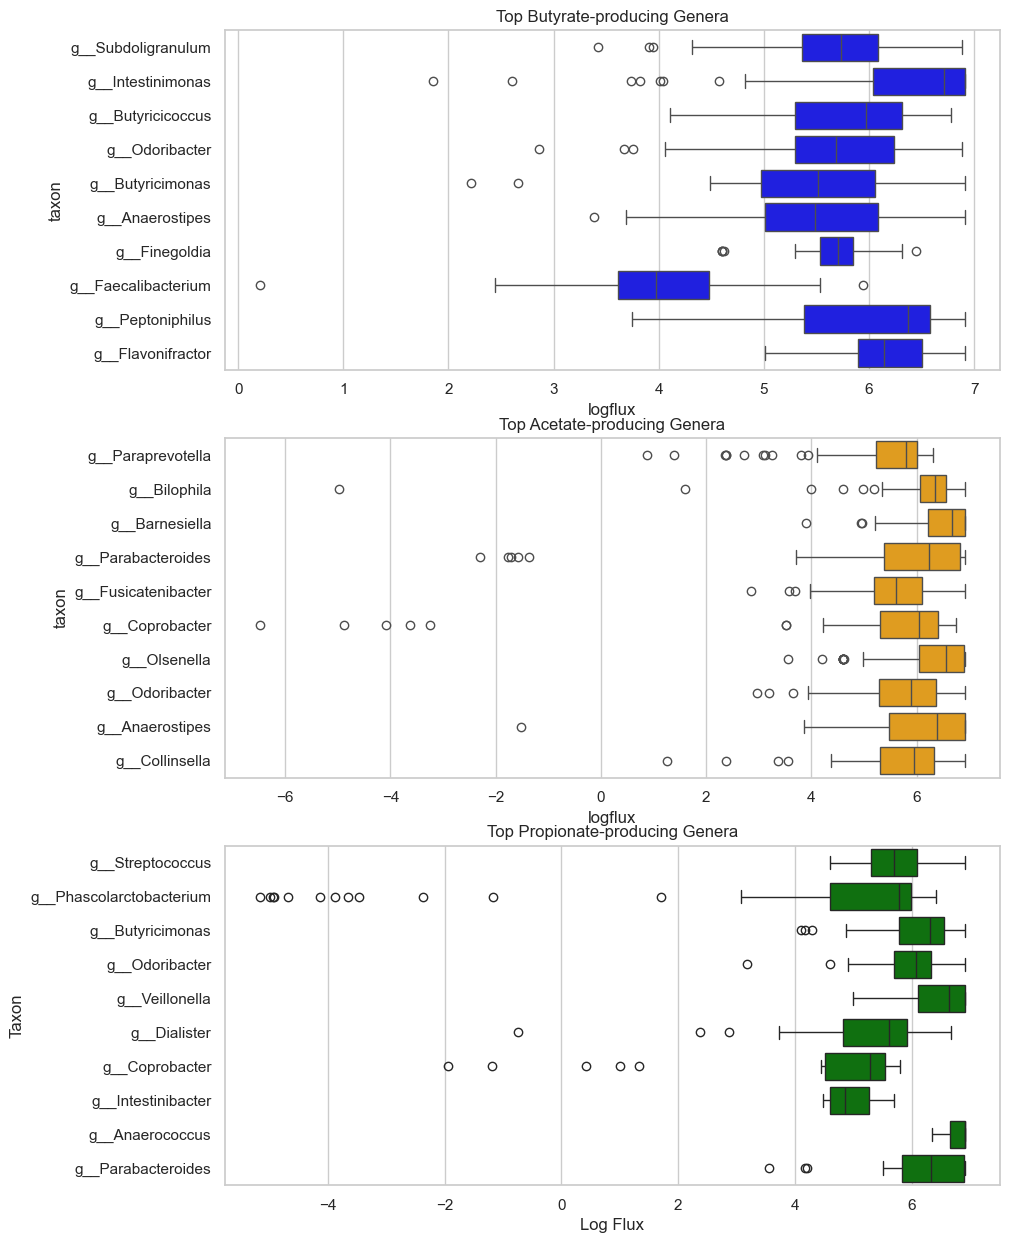

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

exports=growth_results.exchanges #Get samples exchanges
exports=exports[exports.direction=='export'] #Filter for  exports

but=exports[exports.reaction=='EX_but(e)'] #Get butyrate specific exports
ace=exports[exports.reaction=='EX_ac(e)'] #Get acetate specific exports
prop=exports[exports.reaction=='EX_ppa(e)'] #Get propionate specific exports

# create a new column 'logflux'in the 'but' df that will be calculated by the log of the 'flux' column plus 0.001 to avoid log(0)
# want to avoid SettingWithCopyWarning, so we use .loc to ensure we're modifying the original DataFrame
# silence SettingWithCopyWarning
import warnings
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
but.loc[:, 'logflux'] = np.log(but['flux'] + 0.001)  # Log transform flux and account for possibility of zeros
ace.loc[:, 'logflux'] = np.log(ace['flux'] + 0.001)  # Log transform flux and account for possibility of zeros
prop.loc[:, 'logflux'] = np.log(prop['flux'] + 0.001)  # Log transform flux and account for possibility of zeros

#Lets looks at top 3 genera with most non-zero butyrate fluxes
genera=but[but.logflux>-6].groupby(by='taxon').count()['sample_id'].sort_values(ascending=False).index[:10]
genera_ace=ace[ace.logflux>-6].groupby(by='taxon').count()['sample_id'].sort_values(ascending=False).index[:10]
genera_prop=prop[prop.logflux>-6].groupby(by='taxon').count()['sample_id'].sort_values(ascending=False).index[:10]
# filter all of these to only include values > 0

#plot top genera of all three short chain fatty acids (SCFAs) in the same plot using seaborn
plt.figure(figsize=(10, 15))  # Optional function call to specify figure size
#facet the figure to show each SCFA in a separate subplot # Set the style for seaborn plots
# Create a boxplot for each SCFA with the specified order of genera
plt.subplot(3, 1, 1)  # First subplot for butyrate
sns.boxplot(y='taxon', x='logflux', data=but, order=genera, color='blue')    
plt.title('Top Butyrate-producing Genera')  # Add title
plt.subplot(3, 1, 2)  # Second subplot for acetate
sns.boxplot(y='taxon', x='logflux', data=ace, order=genera_ace, color='orange')
plt.title('Top Acetate-producing Genera')  # Add title
plt.subplot(3, 1, 3)  # Third subplot for propionate
sns.boxplot(y='taxon', x='logflux', data=prop, order=genera_prop, color='green')
plt.title('Top Propionate-producing Genera')  # Add title

# add a figure legend that clearly annotates butyrate as blue, acetate as orange, and propionate as green
#plt.legend(['Butyrate', 'Acetate', 'Propionate'], loc='upper right')  # Add legend

plt.xlabel('Log Flux')  # Add x-axis label
plt.ylabel('Taxon')  # Add y-axis label
# Uncomment the following lines to save the plot as an image file
plt.savefig("../data/micom_viz/top_scfas_exporters.png", bbox_inches='tight')

# plt.figure(figsize=(10,3)) #Optional function call to specify figure size
# sns.boxplot(y='taxon',x='logflux',data=but,order=genera)
# plt.title('Top Butyrate Exporters') #Add title